In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Bonds') + ['AGG', 'BND', 'BNDX', 'BIV', 'SCHZ'], 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-21 to 2019-07-10 - 77


In [5]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['std'] > 0.1)]
print(len(stats))
stats

63


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
BNDX,30,0.452657,0.232855,1.773528,2.823805,0.347043
EMLC,30,1.158531,0.757953,1.476145,7.507386,0.546927
VWOB,30,0.714692,0.585343,1.153186,3.927952,0.695306
IGIB,30,0.531949,0.462552,1.064239,3.539120,0.788507
VCIT,30,0.547266,0.479995,1.057476,3.623434,0.800001
USIG,30,0.558414,0.490558,1.057432,3.557154,0.821250
VCLT,30,1.040151,0.958686,1.043583,6.345895,1.592322
LMBS,30,0.164702,0.127024,0.984218,1.068698,0.135161
LQD,30,0.711496,0.686530,0.978564,4.489838,1.224685


evicted LMBS 0.739 -0.045
evicted SLQD 0.664 -0.229
evicted VWOB 0.793 -0.474
evicted BWX 0.684 -0.038
evicted TFI 0.749 -0.297
evicted PZA 0.620 -0.355
evicted EMLC 0.424 -0.192
evicted SUB 0.476 0.239


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted NUV 0.351 -0.100
retry backlogs ['IEF', 'IEI', 'MBB', 'IBDL', 'VGIT', 'GOVT', 'BND', 'BSV', 'SPIB', 'USIG', 'LQD', 'TIP', 'BIV', 'SCHR', 'BSCK', 'MUB', 'JNK', 'SPSB', 'AGG', 'BLV', 'SHY', 'VGSH', 'VTIP', 'TDTT', 'SPTS', 'CMF', 'HYG', 'IPE', 'ISTB', 'SPTL', 'STIP', 'VCSH', 'IGSB', 'SCHO', 'SCHZ', 'IGIB', 'VMBS', 'HYS', 'HYLS', 'ITM', 'HYLB', 'SCHP', 'VTEB', 'SJNK', 'SHYG', 'EMB', 'BSJK', 'VCLT', 'VCIT', 'TLT', 'CWB'] at 0.805/-0.51 - 1.866
evicted SCHP 0.805 -0.329
evicted EMB 0.737 -0.228
evicted VCIT 0.783 -0.124
evicted BSCK 0.482 0.360
evicted CMF 0.510 0.434
retry backlogs ['VMBS', 'BND', 'IEI', 'GOVT', 'HYG', 'VTIP', 'SPSB', 'BSV', 'SCHO', 'IGSB', 'TIP', 'VGIT', 'SHY', 'SCHR', 'AGG', 'VGSH', 'SCHZ', 'ISTB', 'TLT', 'VCSH', 'BSJK', 'MUB', 'IPE', 'STIP', 'TDTT', 'LQD', 'MBB', 'IGIB', 'BLV', 'SPIB', 'IEF', 'SHYG', 'USIG', 'JNK', 'VTEB', 'BIV', 'ITM', 'SPTS', 'SJNK', 'HYS', 'HYLB', 'HYLS', 'VCLT', 'SPTL', 'IBDL', 'CWB'] at 0.810/-0.52 - 1.866
evicted VTEB 0.501 0.408
evicted IB

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,0.355422,0.174201,0.039236,0.231299,0.393019,0.480062,0.667413,1.812499,2.276752,0.251458
BNDX,30.0,0.452657,0.232855,0.000000,0.291096,0.496010,0.634484,0.830923,1.773528,2.823805,0.347043
HYD,30.0,0.181523,0.175208,-0.330397,0.081283,0.189364,0.291363,0.562295,0.809555,1.304214,0.409065


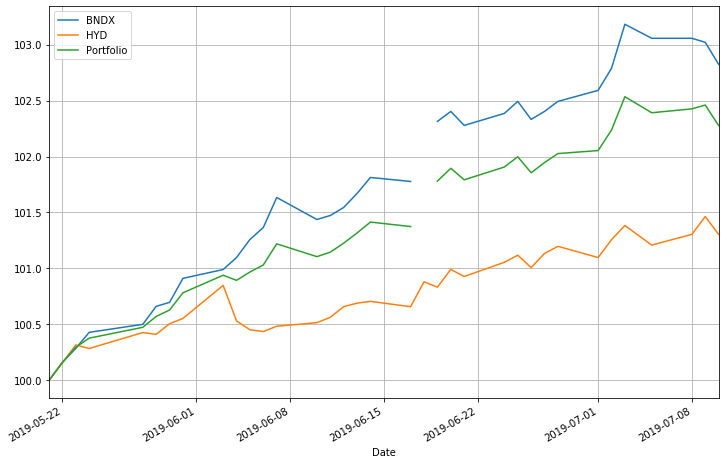

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1, backlogs_pos_threshold=.8)
quote.setup_mask({'BNDX', 'HYD'})
sd.update(quote.optimize_portfolio(.1))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(.1))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)